In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency

import sys
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import chi2,f_classif, mutual_info_classif, SelectKBest
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
import lightgbm as lgb
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import RobustScaler
from imblearn.combine import SMOTEENN
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.naive_bayes import ComplementNB, GaussianNB, MultinomialNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.feature_extraction import DictVectorizer

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Nhóm 3/Bài tập trên lớp/Báo cáo tiến trình/Project/feature_extraction.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35849 entries, 0 to 35848
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gioitinh              35849 non-null  int64  
 1   xeploai_tt            35849 non-null  int64  
 2   hocky                 35849 non-null  int64  
 3   namhoc                35849 non-null  int64  
 4   drltl                 35849 non-null  int64  
 5   sotchk                35849 non-null  int64  
 6   dtbhk_truoc           35849 non-null  float64
 7   xeploai               35849 non-null  int64  
 8   khuvuc_encoded        35849 non-null  int64  
 9   namnhaphoc            35849 non-null  int64  
 10  chuyennganh2_encoded  35849 non-null  float64
 11  hedt_encoded          35849 non-null  int64  
 12  khoa_encoded          35849 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 3.6 MB


In [10]:
X = df.drop(['xeploai'], axis =1)
y = df['xeploai']

In [11]:
resampler = SMOTEENN(sampling_strategy="auto", random_state=42)
X, y = resampler.fit_resample(X, y)

In [12]:
print("Resampled X shape:", X.shape)
print("Resampled y shape:", y.shape)

Resampled X shape: (44564, 12)
Resampled y shape: (44564,)


In [13]:
pip install tensorflow

# Deep learning

In [25]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Reshape, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler, RobustScaler

features1 = ['drltl', 'sotchk']
features2 = ['namhoc', 'dtbhk_truoc']

X1 = np.array(X[features1])
X2 = np.array(X[features2])

num_classes = len(np.unique(y))

# Tiền xử lý dữ liệu
scaler = RobustScaler()
X1_scaled = scaler.fit_transform(X1)
X2_scaled = scaler.fit_transform(X2)

# Mã hóa y sang dạng one-hot
y_one_hot = to_categorical(y, num_classes=num_classes)

# Định nghĩa mô hình
input_1 = Input(shape=(X1_scaled.shape[1],))
input_2 = Input(shape=(X2_scaled.shape[1],))

x1_layer = Dense(128, activation='relu')(input_1)
x2_layer = Dense(128, activation='relu')(input_2)

merged = Concatenate()([x1_layer, x2_layer])
merged = Dropout(0.4)(merged)
merged = Dense(64, activation='relu')(merged)

output = Dense(num_classes, activation='softmax')(merged)  #
model = Model(inputs=[input_1, input_2], outputs=output)


model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Huấn luyện
history = model.fit(
    [X1_scaled, X2_scaled], y_one_hot,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)


Epoch 1/100
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5248 - loss: 1.2059 - val_accuracy: 0.5334 - val_loss: 0.8617 - learning_rate: 1.0000e-04
Epoch 2/100
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6567 - loss: 0.7844 - val_accuracy: 0.5935 - val_loss: 0.7964 - learning_rate: 1.0000e-04
Epoch 3/100
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6811 - loss: 0.7377 - val_accuracy: 0.5992 - val_loss: 0.8094 - learning_rate: 1.0000e-04
Epoch 4/100
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6852 - loss: 0.7271 - val_accuracy: 0.5783 - val_loss: 0.8247 - learning_rate: 1.0000e-04
Epoch 5/100
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6871 - loss: 0.7203 - val_accuracy: 0.6175 - val_loss: 0.7910 - learning_rate: 1.0000e-04
Epoch 6/100
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6915 - loss: 0.7137 - val_accuracy: 0.6302 - val_loss: 0.7780 - learning_rate: 1.0000e-04
Epoch 7/100
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 3s 

In [27]:
train_accuracy = history.history['accuracy']
train_accuracy[-1]

0.698297381401062

In [28]:
val_accuracy = history.history['val_accuracy']
val_accuracy[-1]

0.6345787048339844

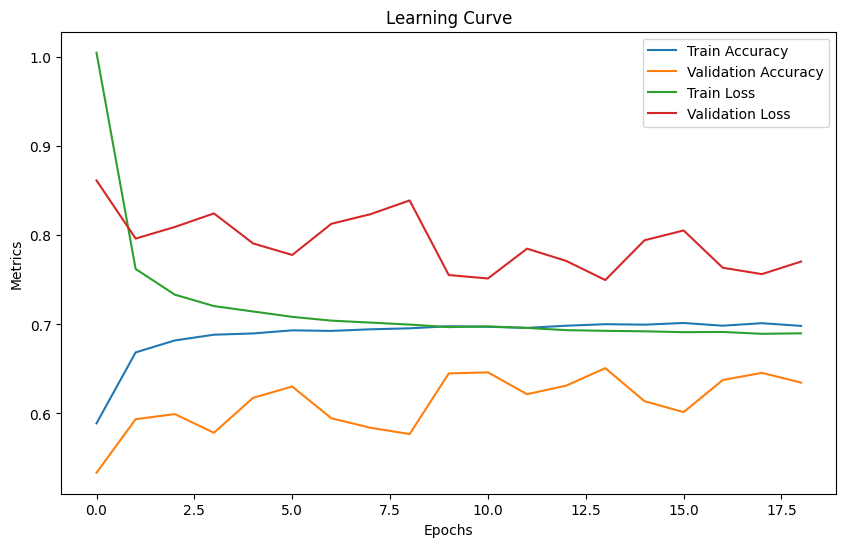

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Learning Curve")
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.show()

- Ở tập val, acc bắt đầu từ 53.34%, tăng lên mức cao nhất là 65.8% (epoch 14), tuy nhiên lại biến động khá lớn giữa các epoch, với một số epoch bị giảm (ví dụ, giảm xuống 60.15% ở epoch 16) => Bị overfitting
- Acc giữa train và val cách biệt không nhiều (~5-10%), cho thấy mô hình không bị overfitting quá mức.

# Thêm cơ chế Attention

In [30]:
from tensorflow.keras.layers import Reshape

# Định nghĩa mô hình
input_1 = Input(shape=(X1_scaled.shape[1],))
input_2 = Input(shape=(X2_scaled.shape[1],))

# Xử lý đặc trưng riêng biệt
x1_layer = Dense(128, activation='relu')(input_1)
x2_layer = Dense(128, activation='relu')(input_2)

# Chuyển đầu ra thành tensor 3D
x1_reshaped = Reshape((1, 128))(x1_layer)  # Thêm trục thời gian
x2_reshaped = Reshape((1, 128))(x2_layer)

# Attention giữa hai đặc trưng
attention = Attention()([x1_reshaped, x2_reshaped])  # Áp dụng Attention
attention_flattened = Reshape((128,))(attention)  # Quay về 2 chiều

# Kết hợp Attention và đầu ra gốc
merged = Concatenate()([x1_layer, x2_layer, attention_flattened])

# Tiếp tục với Dropout và Dense
merged = Dropout(0.4)(merged)
merged = Dense(64, activation='relu')(merged)

# Lớp đầu ra
output = Dense(num_classes, activation='softmax')(merged)

# Định nghĩa mô hình
model = Model(inputs=[input_1, input_2], outputs=output)

# Compile mô hình
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(
    [X1_scaled, X2_scaled], y_one_hot,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)


Epoch 1/100
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5166 - loss: 1.1827 - val_accuracy: 0.5320 - val_loss: 0.8571 - learning_rate: 1.0000e-04
Epoch 2/100
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6769 - loss: 0.7450 - val_accuracy: 0.5884 - val_loss: 0.8337 - learning_rate: 1.0000e-04
Epoch 3/100
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6906 - loss: 0.7204 - val_accuracy: 0.5889 - val_loss: 0.8384 - learning_rate: 1.0000e-04
Epoch 4/100
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6942 - loss: 0.7105 - val_accuracy: 0.6495 - val_loss: 0.7527 - learning_rate: 1.0000e-04
Epoch 5/100
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6881 - loss: 0.7157 - val_accuracy: 0.6598 - val_loss: 0.7478 - learning_rate: 1.0000e-04
Epoch 6/100
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6899 - loss: 0.7054 - val_accuracy: 0.6478 - val_loss: 0.7461 - learning_rate: 1.0000e-04
Epoch 7/100
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 7s 

In [31]:
train_accuracy = history.history['accuracy']
train_accuracy[-1]

0.7019438147544861

In [32]:
val_accuracy = history.history['val_accuracy']
val_accuracy[-1]

0.6242567300796509

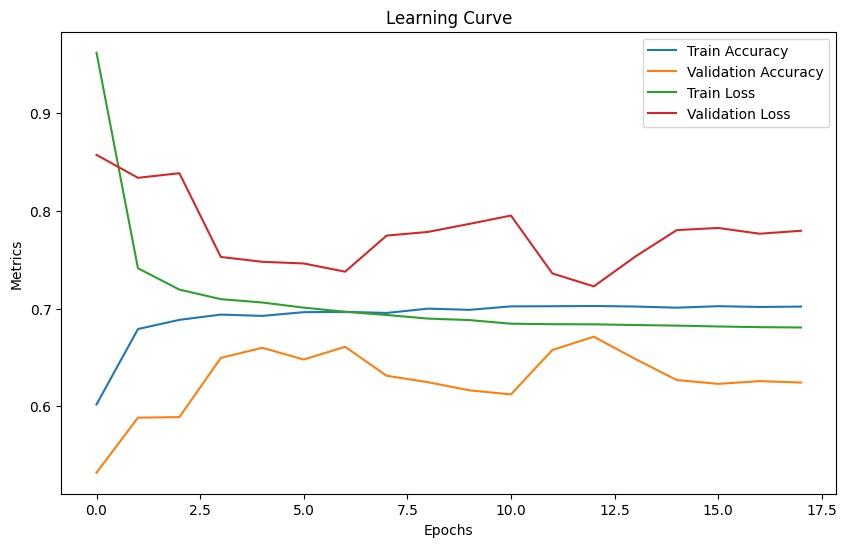

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Learning Curve")
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.show()

Vẫn gặp vấn đề như trên